# Making Predictions

In [1]:
import torch

In [2]:
w = torch.tensor(3.0, requires_grad = True)
b = torch.tensor(1.0, requires_grad = True)

In [3]:
def forward(x):
    y = w*x + b
    return y

In [4]:
x = torch.tensor([[4], [7]])
forward(x)

tensor([[13.],
        [22.]], grad_fn=<AddBackward0>)

# Linear Class

In [5]:
from torch.nn import Linear

In [6]:
torch.manual_seed(1)
model = Linear(in_features=1, out_features=1)
print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [7]:
x = torch.tensor([[2.0], [3.3]])
print(model(x))

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward0>)


# Custom Modules

In [8]:
import torch.nn as nn
class LR(nn.Module):
    def __init__(self, input_size, output_size):
    # initialisation de la classe LR 
        super().__init__()
        # appelle le constructeur de la classe de base 'nn.Module', assurant que l'initialisation de la classe de base est effectuée avant l'initialisation spécifique à la classe LR.
        self.linear = nn.Linear(input_size,output_size)
    def forward(self,x):
        pred = self.linear(x)
        return pred

In [9]:
model = LR(1,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.1939]], requires_grad=True), Parameter containing:
tensor([0.4694], requires_grad=True)]


In [10]:
x = torch.tensor([[1.0],[2.0]])
print(model.forward(x))

tensor([[0.2755],
        [0.0816]], grad_fn=<AddmmBackward0>)


# Creating Dataset

In [11]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'X')

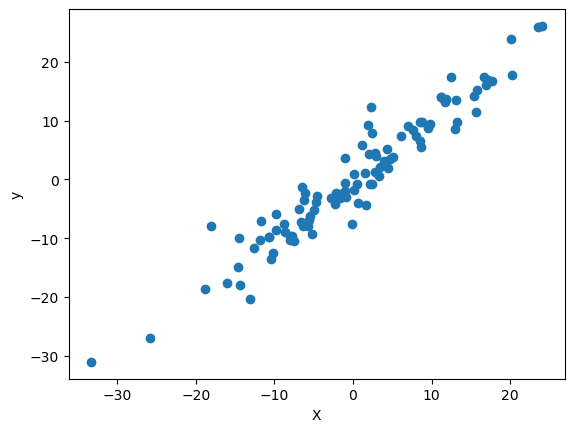

In [12]:
X = torch.randn(100,1)*10
y = X  + torch.randn(100,1)*3
plt.plot(X.numpy(),y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('X')

In [13]:
model = LR(1,1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [14]:
[w, b] = model.parameters()
def get_params():
    return (w[0][0].item(), b[0].item())

In [15]:
get_params()

(-0.6993244886398315, 0.6572802066802979)

In [16]:
import numpy as np
def plot_fit(title):
    plt.tilte = title
    w1, b1 = get_params()
    x1 = np.array([-30,30])
    y1 = w1*x1 + b1
    plt.plot(x1,y1, 'r')
    plt.scatter(X,y)
    plt.show()

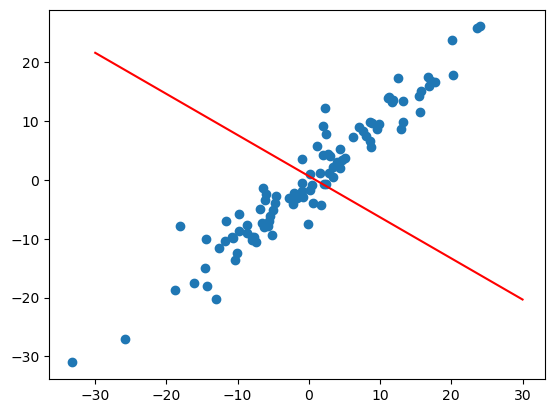

In [17]:
plot_fit('Simple Linear Regression')

# Loss Function, Gradient Descent and Mean Squared Error

In [18]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.001)

In [19]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    print('epoch:', i, 'loss:', loss.item())
    losses.append(loss)
    
    optimizer.zero_grad()   
    loss.backward()   
    optimizer.step()

epoch: 0 loss: 337.26202392578125
epoch: 1 loss: 203.69261169433594
epoch: 2 loss: 124.55746459960938
epoch: 3 loss: 77.67243957519531
epoch: 4 loss: 49.89436340332031
epoch: 5 loss: 33.43640899658203
epoch: 6 loss: 23.685178756713867
epoch: 7 loss: 17.907428741455078
epoch: 8 loss: 14.483807563781738
epoch: 9 loss: 12.454916000366211
epoch: 10 loss: 11.252350807189941
epoch: 11 loss: 10.539355278015137
epoch: 12 loss: 10.116409301757812
epoch: 13 loss: 9.865309715270996
epoch: 14 loss: 9.716024398803711
epoch: 15 loss: 9.62706184387207
epoch: 16 loss: 9.573840141296387
epoch: 17 loss: 9.541794776916504
epoch: 18 loss: 9.522300720214844
epoch: 19 loss: 9.510241508483887
epoch: 20 loss: 9.50259017944336
epoch: 21 loss: 9.497552871704102
epoch: 22 loss: 9.49406623840332
epoch: 23 loss: 9.491500854492188
epoch: 24 loss: 9.489480972290039
epoch: 25 loss: 9.487789154052734
epoch: 26 loss: 9.486291885375977
epoch: 27 loss: 9.484911918640137
epoch: 28 loss: 9.483604431152344
epoch: 29 loss: 9

In [20]:
losses_list = []
for i in range(epochs):
    losses_list.append(losses[i].detach().numpy())
losses_numpy = np.array(losses_list)

Text(0.5, 0, 'epoch')

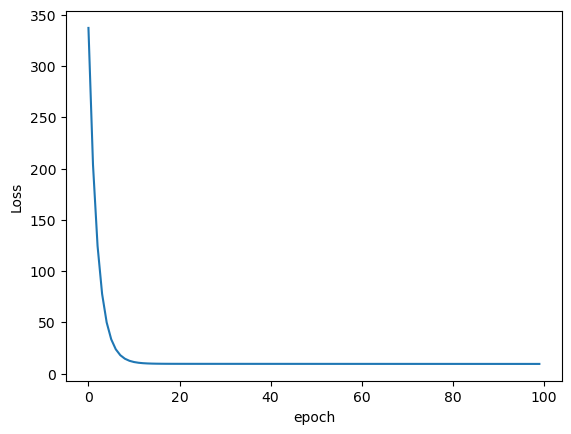

In [21]:
plt.plot(range(epochs), losses_numpy)
plt.ylabel('Loss')
plt.xlabel('epoch')

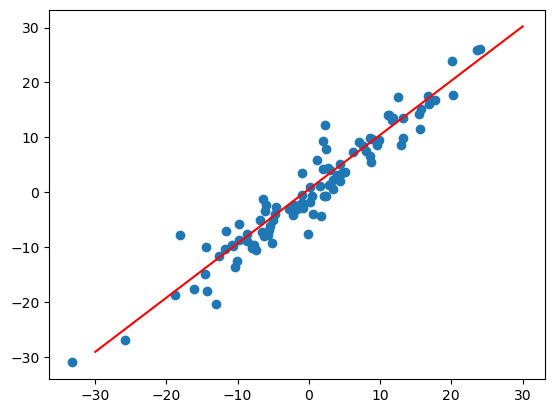

In [22]:
plot_fit('Training Model')